In [101]:
# paraPropPython time-dependent signal example use of paraPropPython.py notebook
# s. prohira, c. sbrocco
import sys
sys.path.append('../')
%matplotlib inline
import paraPropPython as ppp
from receiver import receiver
import numpy as np
import matplotlib.pyplot as plt
import util as util
import time

In [102]:
##### time-dependent example #####

### first, initialize an instance of paraProp by defining its dimensions and frequency of interest ###
iceDepth = 30. # m
iceLength = 50. # m
dx = 1 # m
dz = 0.05 # m

freq = 0.2

### it is useful to set the reference depth as the source depth when you only have one transmitter ###
sourceDepth = 10. # m
sim = ppp.paraProp(iceLength, iceDepth, dx, dz, refDepth=1, airHeight=1)

### useful arrays for plottinng ###
z = sim.get_z()
x = sim.get_x()

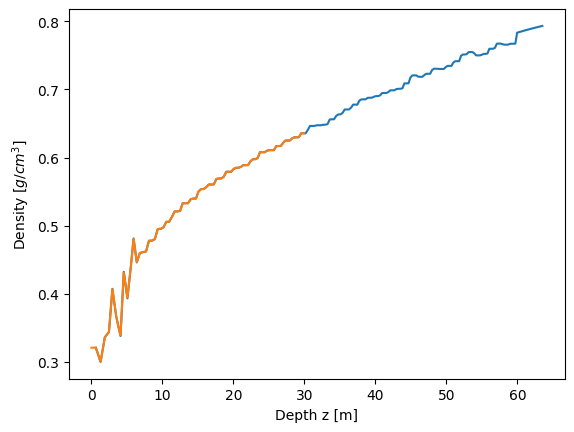

In [103]:
### NOTE: define n before defining source ###
def get_profile_from_file(fname):
    profile_data = np.genfromtxt(fname)
    z_profile = profile_data[:,0]
    n_profile = profile_data[:,1]
    return n_profile, z_profile

### an example of defining n as a function of z (also can be done using a vector, see implementation) ###
rho_vec0, z_vec0 = get_profile_from_file('NP_data_dzb.txt')
rho_vec0 = rho_vec0/1e3

A0 = 1.0
B0 = 0.841
def rho2refindex(rho, A, B):
    return A + B * rho

z_vec = np.arange(0, iceDepth, dz)
rho_vec = np.interp(z_vec, z_vec0, rho_vec0)

n_vec = rho2refindex(rho_vec, A0, B0)


plt.plot(z_vec0, rho_vec0,label='NP Data')
plt.plot(z_vec, rho_vec,label='NP Data interpolated (5 cm)')
plt.ylabel(r'Density [$g/cm^{3}$]')
plt.xlabel('Depth z [m]')
plt.show()

In [104]:
print(len(n_vec), len(z_vec))

600 600


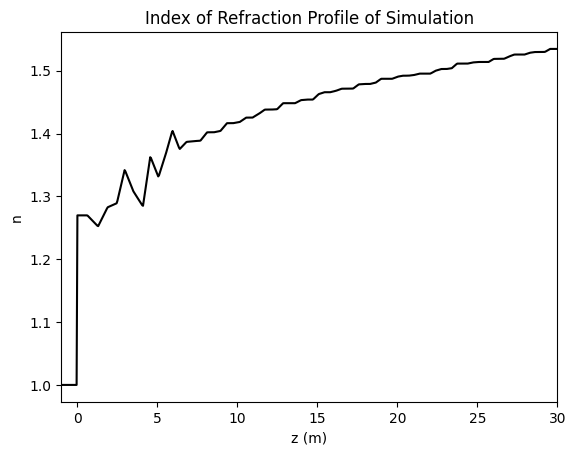

In [105]:
sim.set_n(nVec=n_vec, zVec=z_vec)

### plot ###
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])

plt.show()

1.1897036348777963 0.05


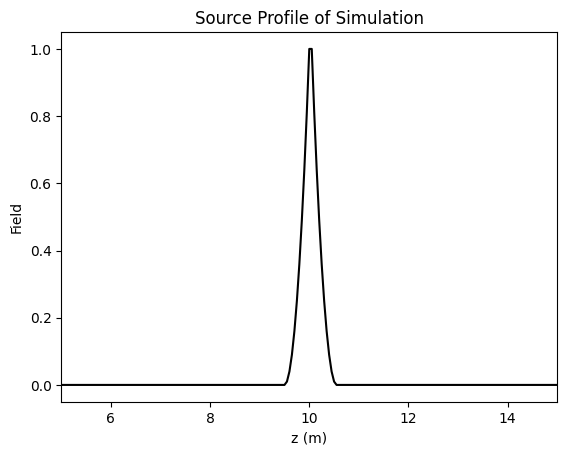

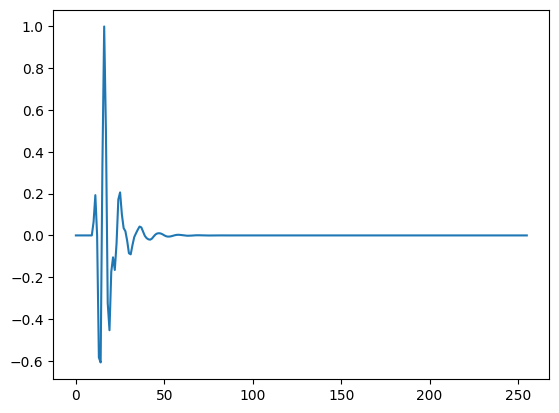

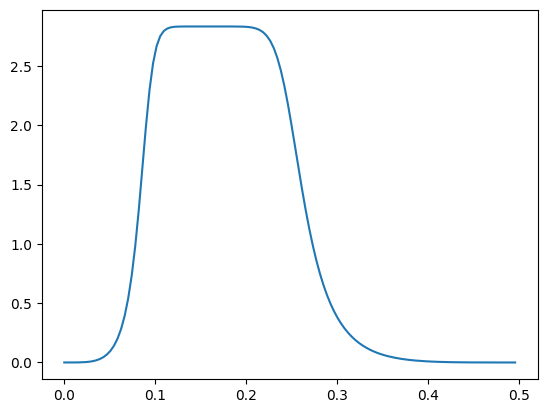

In [106]:
### an example of defining the source as a dipole ###
### (also can be done using a vector or function like n, see implementation) ###
sim.set_dipole_source_profile(freq, sourceDepth)

### plot, zoomed in ###
plt.plot(z, abs(sim.get_source_profile()), color='black')
plt.ylabel('Field')
plt.xlabel('z (m)')
plt.title('Source Profile of Simulation')
plt.xlim(sourceDepth - 5, sourceDepth + 5)
plt.show()


### set a td signal ###
dt = 1
impulse = np.zeros(2**8, dtype='complex')
impulse[10] = 1+0j
sig = util.normToMax(util.butterBandpassFilter(impulse, 0.09, 0.25, 1/dt, 4))
sim.set_td_source_signal(sig, dt)

t = sim.get_time()
f = sim.get_frequency()
A = sim.get_spectrum()
plt.plot(t, sig.real)
plt.show()
plt.plot(f, abs(A))
plt.show()


In [107]:
rxList = [receiver(30, 15)]
tic = time.perf_counter()
### run the solver ###
sim.do_solver(rxList)
toc = time.perf_counter()
print(f"Simulation ran in: {toc-tic:0.4} seconds")

one-way
Simulation ran in: 3.537 seconds


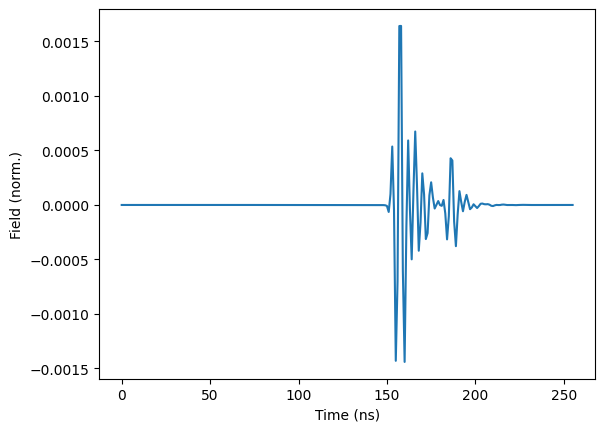

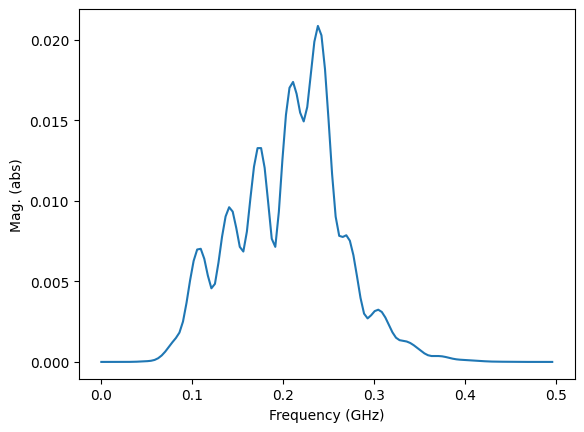

In [108]:
rx = rxList[0]
t = rx.get_time()
sig = rx.get_signal().real
f = rx.get_frequency()
spec = rx.get_spectrum()

#wrapped = np.roll(sig, -np.argmax(sig)+45)
plt.plot(t, sig)
plt.xlabel("Time (ns)")
plt.ylabel("Field (norm.)")
plt.show()
plt.plot(f, abs(spec)) 
plt.xlabel("Frequency (GHz)")
plt.ylabel("Mag. (abs)")
#plt.xlim(0,0.5)
plt.show()

